In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [70]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [59]:
df=pd.DataFrame(housing.data,columns=housing.feature_names)
df['Price']=housing.target

In [71]:
df.head()
#df.columns

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [62]:
X=df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']]

In [63]:
y=df['Price']

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [65]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [66]:
print(lm.intercept_)

-37.285328998751645


In [67]:
lm.coef_

array([ 4.41037995e-01,  9.68801816e-03, -1.04781309e-01,  6.22052706e-01,
       -5.61452681e-06, -3.28792384e-03, -4.23182318e-01, -4.37898856e-01])

In [68]:
coeffDF=pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

In [69]:
coeffDF

,Coefficient
MedInc,0.441038
HouseAge,0.009688
AveRooms,-0.104781
AveBedrms,0.622053
Population,-0.000006
AveOccup,-0.003288
Latitude,-0.423182
Longitude,-0.437899


In [73]:
prediction=lm.predict(X_test)

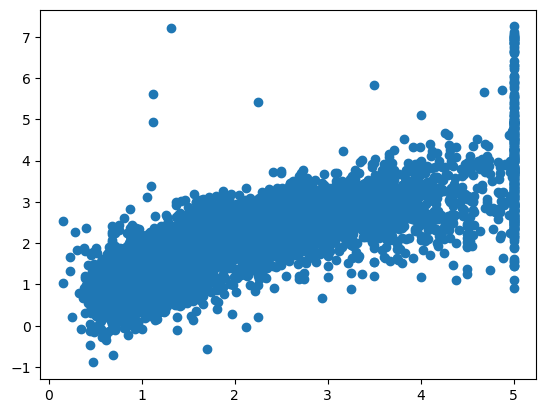

In [76]:
plt.scatter(y_test,prediction)

<AxesSubplot:xlabel='Price', ylabel='Count'>

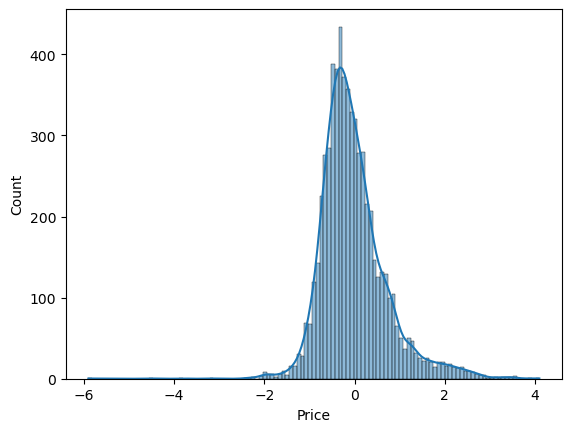

In [83]:
sns.histplot(y_test-prediction,kde=True)

In [79]:
#Regression Evaluation Metrics
from sklearn import metrics

In [82]:
print('MAE : ',metrics.mean_absolute_error(y_test,prediction))
print('MSE : ',metrics.mean_squared_error(y_test,prediction))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE :  0.5352476763196592
MSE :  0.5296293151408239
RMSE : 0.7277563569910083


In [2]:
coefficents=pd.DataFrame(lm.coef_,X.columns)

NameError: name 'pd' is not defined